<a href="https://colab.research.google.com/github/eslamahmed235/Arabic-dialect-classification-ML-DL/blob/main/ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1--aRBIwOYIQlljZCuAln36bAomq_7fxE' -O clean_tweet.csv
# https://drive.google.com/file/d/1--aRBIwOYIQlljZCuAln36bAomq_7fxE/view?usp=sharing
# https://drive.google.com/file/d/1--aRBIwOYIQlljZCuAln36bAomq_7fxE/view?usp=sharing


--2022-03-14 18:30:01--  https://docs.google.com/uc?export=download&id=1--aRBIwOYIQlljZCuAln36bAomq_7fxE
Resolving docs.google.com (docs.google.com)... 172.217.204.138, 172.217.204.101, 172.217.204.102, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘clean_tweet.csv’

clean_tweet.csv         [ <=>                ]   2.15K  --.-KB/s    in 0s      

2022-03-14 18:30:01 (20.9 MB/s) - ‘clean_tweet.csv’ saved [2206]



In [47]:
import pandas as pd
import numpy as np
import requests
import json as js
from time import sleep

from imblearn.pipeline       import Pipeline 
from sklearn.model_selection import cross_validate
from imblearn.over_sampling  import RandomOverSampler
import numpy as np
from sklearn.metrics import precision_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

from sklearn.pipeline import Pipeline
from keras.callbacks import TensorBoard
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler

from imblearn.under_sampling import TomekLinks

# !pip install gensim spacy nltk
from sklearn.feature_extraction.text import TfidfVectorizer

!pip install pyarabic
import pyarabic
import pyarabic.araby as araby
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from textblob import TextBlob
from __future__ import unicode_literals
import regex as re

from numpy.ma.core import size
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.svm import LinearSVC
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import ComplementNB, GaussianNB , BernoulliNB 

from sklearn.pipeline import Pipeline, FeatureUnion
import pyarabic.araby as araby
from pyarabic.araby import normalize_ligature
from pyarabic.araby import normalize_hamza
import re

In [32]:
Data = pd.read_csv("/content/drive/MyDrive/projects/AIM Assignment/Cleaned_tweet.csv",lineterminator='\n',dtype='string')


In [49]:

def conf_Matrix(y_test, y_pred):
  
  cf_matrix = confusion_matrix(y_test, y_pred)
  sns.set(rc = {'figure.figsize':(18,9)})
  ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
  

  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Flower Category')
  ax.set_ylabel('Actual Flower Category ');

  # ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(set(Data['dialect']))
  ax.yaxis.set_ticklabels(set(Data['dialect']))

  ## Display the visualization of the Confusion Matrix.
  
  plt.show()
  # plt.figure(figsize=(15,7)) 
  

def testModel(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True, stratify=y )
    model.fit(X_train,y_train)
    modelName = type(model).__name__
    pred=model.predict(X_test)
    conf_Matrix(y_test, pred)
    # plot_roc_pr(y_pred = pred, y_test = y_test)

    print(modelName)
    print(classification_report(y_test,model.predict(X_test)))
    # score=np.mean(cross_val_score(model, X, y, cv=5))
    f1_scoree = f1_score(y_test, pred, average='macro')
    accuracy = accuracy_score(y_test, pred)

    print("ML Ensemble modle F1 score : ", f1_scoree)
    print("ML Ensemble modle accuracy : ", accuracy)

    return model,{"model":modelName,"f1_scoree":f1_scoree} #"score":score,

In [34]:
def basic_tokenize(tweet):
    return tweet.split(' ')
    
def skipgram_tokenize(tweet, n=None, k=None, include_all=True):
    from nltk.util import skipgrams
    tokens = [w for w in basic_tokenize(tweet)]
    if include_all:
        result = []
        for i in range(k+1):
            skg = [w for w in skipgrams(tokens, n, i)]
            result = result+skg
    else:
        result = [w for w in skipgrams(tokens, n, k)]
    result=set(result)
    #print(result)
    return result

In [42]:
undersample = RandomUnderSampler()
X_un, y_un  = undersample.fit_resample(np.array(Data['clean_tweet_split']).reshape(-1, 1), Data['dialect'])
d = {'tweet': X_un, 'dialect': y_un}
df_data= pd.DataFrame(X_un)
df_data['dialect'] = y_un
df_data.columns = ["tweet", 'dialect']

df_data.dropna(inplace=True)

,tweet,dialect
0,جامل +تشوف +الكل +بالخير +يطريك +نافق +تعيش +ا...,AE
1,الله +يعطيك +طوله +العمر +يالحبيب +ابو +خالد +...,AE
2,مبرووك +مبرووك +حقك +تفتخر +يحفظها +وتشوفها +ب...,AE
3,هه +يالكعبي +مطرب,AE
4,ينطبق +عليهم +المثل +يقول +حافي +يلوث +مفصخ,AE
...,...,...
166423,السهلاوي +نجم +المباراه +اوفر +السهلاوي +لجيبو...,YE
166424,شغل +دوله +والوهابين +جالسين +عندسواقه +المراه...,YE
166425,+انسان +سيء +جدا +استاهل +الحب +خلاص +ابعدو +عني,YE
166426,الخادم +حقنا +اليمن +تعب +بيجري +لعبه +ببجي +ك...,YE


In [51]:
def dummy_fun(doc):
    return doc
print("Extracting features from the training data using a sparse vectorizer")
def make_skip_tokenize(n, k, include_all=True):
    return lambda tweet: skipgram_tokenize(tweet, n=n, k=k, include_all=include_all)


union = FeatureUnion([
                      # ("C_V", CountVectorizer(ngram_range=(1,2),min_df=.2,analyzer='word', tokenizer=dummy_fun, preprocessor=dummy_fun, token_pattern=None)),

                      ("w_v", TfidfVectorizer(sublinear_tf=True, max_df=0.5,analyzer = 'word', ngram_range=(1,2))), # max_features=300,
                      ("c_wb", TfidfVectorizer(sublinear_tf=True, max_df=0.5,analyzer = 'char', ngram_range=(2,5))), # max_features=300,
                      # ("sk",TfidfVectorizer(sublinear_tf=True, max_df=0.5,tokenizer=make_skip_tokenize(n=2, k=2)))
        ],
transformer_weights={
            # "C_V" : 0.5,
            'w_v': 0.5,
            'c_wb': 0.7,
            # 'sk': 0.4,
        }
,
)



X= union.fit_transform(df_data["tweet"])
print("Combined space has", X.shape[1], "features")

y = df_data['dialect']

Extracting features from the training data using a sparse vectorizer
Combined space has 2032251 features


In [44]:
from sklearn.ensemble import VotingClassifier

def build_estimators():
    estimators = []
    sgd = SGDClassifier(alpha=0.00001, max_iter=50,penalty="l2") # alpha=0.00001, max_iter=50,penalty="l2"
    estimators.append(('sgd', sgd))
    svc = LinearSVC(penalty='l2', dual=False,tol=1e-3) # penalty='l2', dual=False,tol=1e-3
    estimators.append(('svc',svc))
    mnb= MultinomialNB(alpha=.01) # alpha=.01
    estimators.append(('mnb',mnb))
    bnb= BernoulliNB( alpha=.01) # alpha=.01
    estimators.append(('bnb',bnb))
    ensemble = VotingClassifier(estimators)
    return ensemble

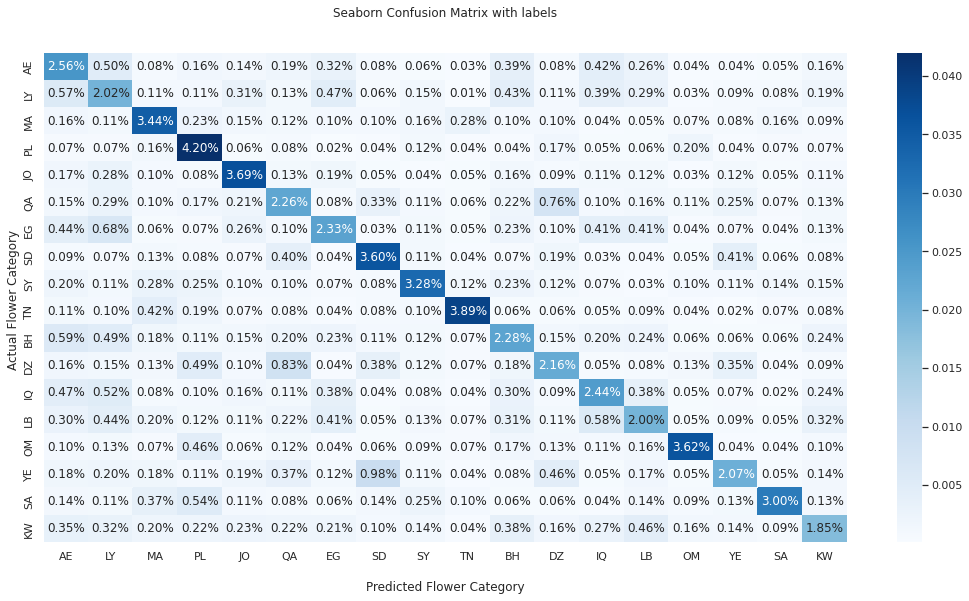

VotingClassifier
              precision    recall  f1-score   support

          AE       0.37      0.46      0.41       924
          BH       0.31      0.36      0.33       924
          DZ       0.55      0.62      0.58       924
          EG       0.55      0.75      0.63       925
          IQ       0.60      0.66      0.63       924
          JO       0.39      0.41      0.40       924
          KW       0.45      0.42      0.44       924
          LB       0.57      0.65      0.61       925
          LY       0.62      0.59      0.60       924
          MA       0.77      0.70      0.73       924
          OM       0.40      0.41      0.41       924
          PL       0.42      0.39      0.41       924
          QA       0.45      0.44      0.44       925
          SA       0.39      0.36      0.37       925
          SD       0.74      0.65      0.69       922
          SY       0.50      0.37      0.43       924
          TN       0.73      0.54      0.62       924
          

In [52]:
# Run ML_model 
ML_model = testModel(build_estimators () ,X, y) 



In [ ]:
# save ML_features and ML_model
import pickle
pickle.dump(ML_model[0], open("ML_model.pkl", 'wb'))
pickle.dump(union, open("ML_features.pkl", 'wb'))

# # load the model from disk
# loaded_model = pickle.load(open("/content/ML_model.pkl", 'rb'))
# loaded_features = pickle.load(open("/content/ML_features.pkl", 'rb'))
